# Project 5: Communicate data findings - Flights Dataset
## by: Amnah Aldayri

## Investigation Overview

> This project aim to Investe the interactions of the flight features and understand the correlations between them.


## Dataset Overview

> Flights Dataset consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_2007 = pd.read_csv('2007.csv.bz2')
df_2008 = pd.read_csv('2008.csv.bz2')

In [3]:
outer_merged = pd.merge(df_2007, df_2008, how="outer")
data = outer_merged.copy()

In [4]:
    %%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Univariate Exploration

> What is the most commonly used Carrier Company?

> From the diagram above, we can observe that WN is the most commonly used Carrier Company in 2007 and 2008.

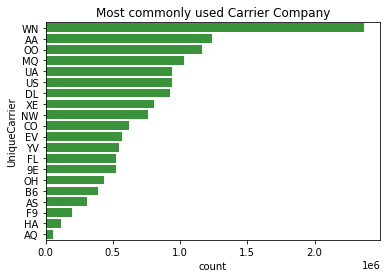

In [5]:
base_color = sb.color_palette()[2]

UniqueCarrier = data['UniqueCarrier'].value_counts().index
sb.countplot(data=data, y='UniqueCarrier', color=base_color, order=UniqueCarrier)
plt.title('Most commonly used Carrier Company');

## Bivariate Exploration

> What is the correlation between Month and weather Delay?

> From the diagram above, we can observe that December (12) is the most month has weather Delay.

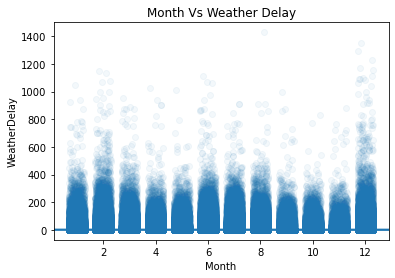

In [7]:
sb.regplot(data = data, x = 'Month', y = 'WeatherDelay', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20}).set(title='Month Vs Weather Delay');

## Multivariate Exploration

> Correlation between Time (Year , Month) and Delay type (CarrierDelay , WeatherDelay ,NASDelay , SecurityDelay , LateAircraftDelay)


> From the diagram, we can observe many types of delays, LateAircraftDelay is the highest one, While the SecurityDelay is the lowest one.

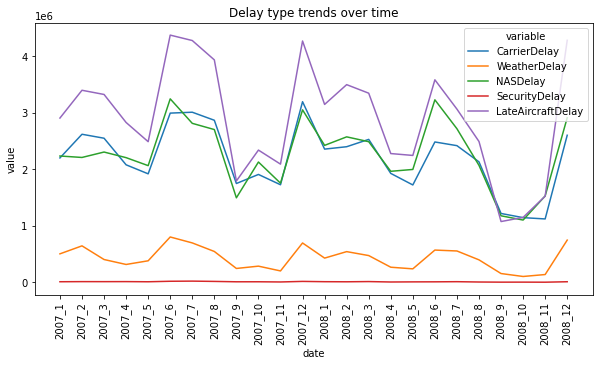

In [9]:
delays_over_time= data.groupby(['Year','Month']).sum().reset_index()
delays_over_time = pd.melt(delays_over_time, id_vars=['Year','Month'], value_vars=['CarrierDelay', 'WeatherDelay',"NASDelay",'SecurityDelay','LateAircraftDelay'])

delays_over_time['date'] = delays_over_time['Year'].astype(str) +"_" +delays_over_time['Month'].astype(str)
delays_over_time = delays_over_time.drop(['Year','Month'], axis=1)

plt.figure(figsize=(10,5))
plt.title('Delay type trends over time')
plt.xticks(rotation=90)
sb.lineplot(x='date', y='value', hue='variable', data=delays_over_time)
plt.show();

In [10]:
{
    "tags": [
        "hide-input",
    ]
}

{'tags': ['hide-input']}

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 716266 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_template.slides.html
Use Control-C to stop this server
